Let's jump right into an example.


The data: we use the XX data, because they already come with shap and make it easier for you to try it out.

So the general order is:

- load data
- train model
- initialize explainer
- compute explanations

You see the model training and the explanation steps are separated.
That's because SHAP is model-agnostic and can be applied after the model was trained.




In this getting-started chapter, we will go through the steps required to use Shap with a machine learning model.


STep 1: Install shap

```{bash}
#| eval: false
pip install shp
```

Step 2: Train the machine learning model

In ths example, we will use a linear regression model to predict the median house price in california, based on features such as location,j average number of rooms, etc.

In [17]:
import xgboost
import shap

X, y = shap.datasets.adult()
model = xgboost.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Step 3: Compute with Shapley values

In [18]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Step 4: Explain instance

Now we have all the Shapley values for the trainign data.

Let's visualize the attributions for the first data point.

In [16]:
shap.Explanation?

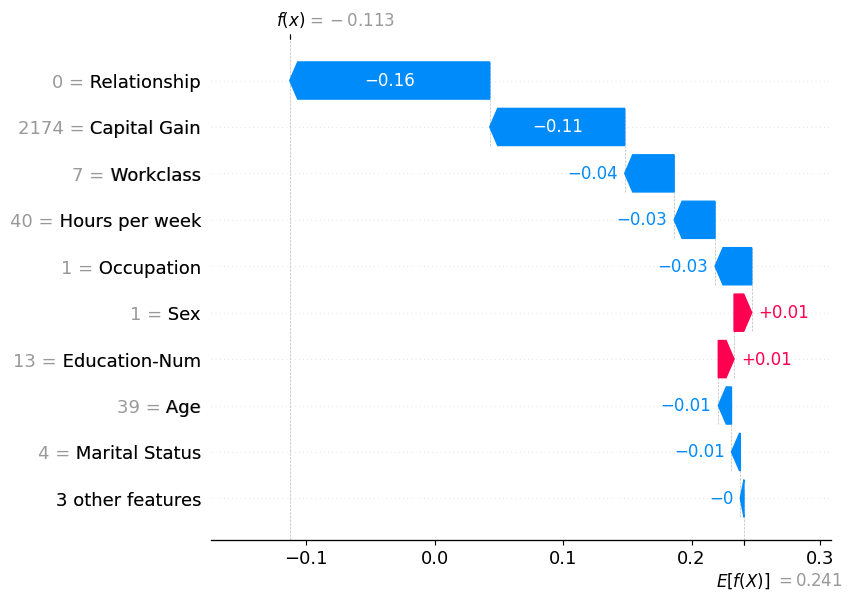

In [8]:
# create an explanation object
#sv = shap.Explanation(values = shap_values[0], base_values = explainer.expected_value)
# plot the explanation
shap.waterfall_plot(shap_values[0])

The plot above is so called waterfall plot.

Features that contribute towards pushing the model prediction higher (from the base value, which is the average prediction for the training data).
And blue for the features values that push it to be lower.

Step 5: Combine multiple Shapley values for global explanations

In [ ]:
shap.summary_plot(shap_values)

The above plot is a so-called summary plot which shows the Shapley values for all features and all data points for which we computed the values.
The plot gives an overview of many things:

- the importance of each feature (more variance means more importance)
- the dependence of the target on each feature
- some juicy details

For example, Relationship is an important feature.
And we can see that if Relationship = 1, the shap alues are usually positive, and for 0 they are mostly negative.
